**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 7**
Análisis de Componentes Principales (PCA)

---

*   EQUIPO: 72

*   NOMBRES Y MATRÍCULAS:
                          Aarón Cortés García A01730451
                          Héctor Segura Quintanilla A01154108
                          José Emilio Malagón Martínez A01794972
                          Oskar Abraham Guarneros Vázquez A01795329

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
DIR = "/content/drive/MyDrive/MNA/Ciencia y Analítica de Datos"
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
cereals_df = pd.read_csv('Cereals.csv')
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 1**. EDA y preprocesamiento

1. Obtén estadísticas descriptivas para todas las variables del dataframe.

In [5]:
cereals_df.describe().T

,count,mean,std,min,25%,50%,75%,max
calories,77.0,106.883117,19.484119,50.000000,100.000000,110.000000,110.000000,160.000000
protein,77.0,2.545455,1.094790,1.000000,2.000000,3.000000,3.000000,6.000000
fat,77.0,1.012987,1.006473,0.000000,0.000000,1.000000,2.000000,5.000000
sodium,77.0,159.675325,83.832295,0.000000,130.000000,180.000000,210.000000,320.000000
fiber,77.0,2.151948,2.383364,0.000000,1.000000,2.000000,3.000000,14.000000
carbo,76.0,14.802632,3.907326,5.000000,12.000000,14.500000,17.000000,23.000000
sugars,76.0,7.026316,4.378656,0.000000,3.000000,7.000000,11.000000,15.000000
potass,75.0,98.666667,70.410636,15.000000,42.500000,90.000000,120.000000,330.000000
vitamins,77.0,28.246753,22.342523,0.000000,25.000000,25.000000,25.000000,100.000000
shelf,77.0,2.207792,0.832524,1.000000,1.000000,2.000000,3.000000,3.000000


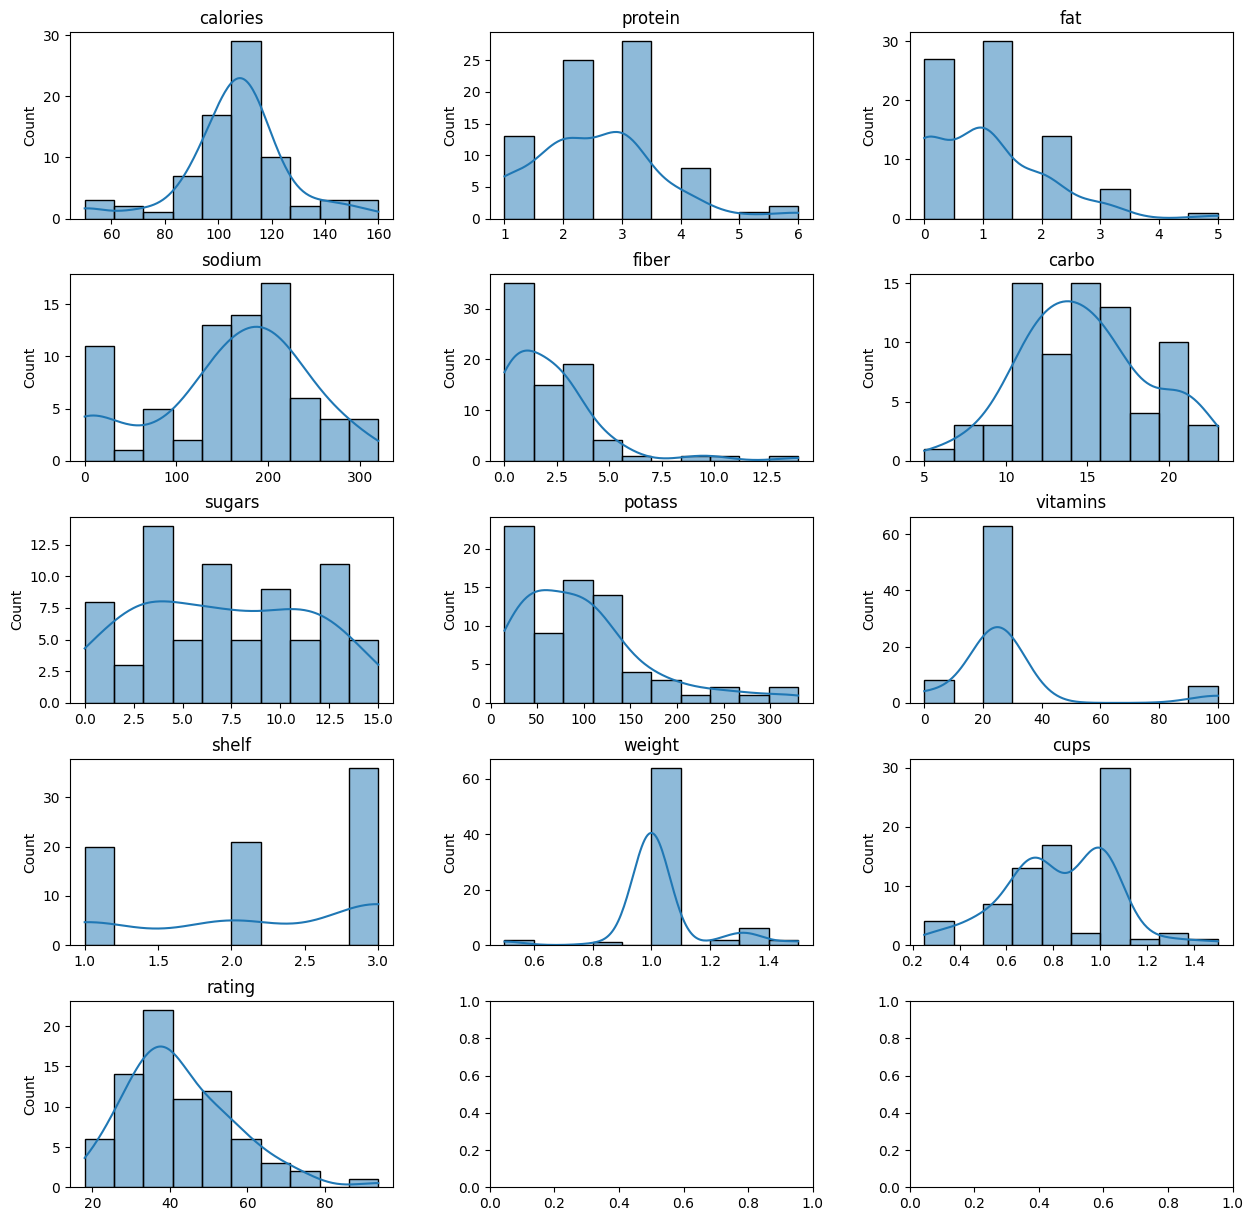

In [6]:
num_cols = cereals_df.select_dtypes(include=np.number).columns.tolist()

fig, axes = plt.subplots(5,3, figsize = (15,15))
plt.subplots_adjust(wspace=0.3, hspace = 0.3)
axes = axes.ravel()
for col, ax in zip(cereals_df[num_cols], axes):
  sns.histplot(x = cereals_df[col], ax = ax, bins = 10, kde = True)
  ax.set(title = f'{col}', xlabel = None)

Genera algunos gráficos para familiarizarte con el conjunto de datos. Al menos deberás incluir los que te permitan responder los siguientes cuestionamientos:

**Nota.** Debes responder de manera explícita las preguntas, apoyándote de los resultados observados de cada gráfico.

2a) ¿Cuál es la frecuencia o conteo de cada categoría para las variables: `mfr` y `shelf` (por separado)?

In [7]:
print(cereals_df['mfr'].value_counts(), '\n')
print(cereals_df['shelf'].value_counts())

K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: mfr, dtype: int64 

3    36
2    21
1    20
Name: shelf, dtype: int64


2b) Combina los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante.

In [8]:
prods_in_shelf = cereals_df['mfr'] * cereals_df['shelf'] # Se multiplican los valores de ambas columnas, produciendo la clave mfr-shelf que revela cuántos
                                                         # cereales hay en cada estante y quien lo manufacturó
values= prods_in_shelf.value_counts()
frame_values = values.to_frame()

frame_values.reset_index(names='mfr & shelf', inplace=True)  # Se hace una columna con las claves mfr-shelf
frame_values = frame_values.sort_values(by='mfr & shelf')

for x, y in frame_values.iterrows():
    shelf = len(y['mfr & shelf']) # El número de letras de la clave nos dice el estante al que corresponde
    num_prods = y[0]
    mfr = y['mfr & shelf'][0] # Se obtiene la inicial del fabricante
    print(f'El fabricante {mfr} tiene {num_prods} producto(s) en el estante {shelf}')

El fabricante A tiene 1 producto(s) en el estante 2
El fabricante G tiene 6 producto(s) en el estante 1
El fabricante G tiene 7 producto(s) en el estante 2
El fabricante G tiene 9 producto(s) en el estante 3
El fabricante K tiene 4 producto(s) en el estante 1
El fabricante K tiene 7 producto(s) en el estante 2
El fabricante K tiene 12 producto(s) en el estante 3
El fabricante N tiene 3 producto(s) en el estante 1
El fabricante N tiene 2 producto(s) en el estante 2
El fabricante N tiene 1 producto(s) en el estante 3
El fabricante P tiene 2 producto(s) en el estante 1
El fabricante P tiene 1 producto(s) en el estante 2
El fabricante P tiene 6 producto(s) en el estante 3
El fabricante Q tiene 1 producto(s) en el estante 1
El fabricante Q tiene 3 producto(s) en el estante 2
El fabricante Q tiene 4 producto(s) en el estante 3
El fabricante R tiene 4 producto(s) en el estante 1
El fabricante R tiene 4 producto(s) en el estante 3


 3a) ¿Cuál es el rango más frecuente de la variable `rating`?

***Confirmando la aproximación que muestra el histograma de rating, el rango más frecuente para esta variable es de 30 a 40.***



In [9]:
cereals_df['rating'].describe()

count    77.000000
mean     42.665705
std      14.047289
min      18.042851
25%      33.174094
50%      40.400208
75%      50.828392
max      93.704912
Name: rating, dtype: float64

In [10]:
cereals_df['rating'].describe()
bins = range(0, 101, 10)
rating_bin = pd.cut(cereals_df['rating'], bins)
pd.value_counts(rating_bin)

(30, 40]     24
(40, 50]     19
(50, 60]     13
(20, 30]     11
(60, 70]      5
(10, 20]      2
(70, 80]      2
(90, 100]     1
(0, 10]       0
(80, 90]      0
Name: rating, dtype: int64

3b) ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden?

Top 10 productos y sus fabricantes

1. All-Bran_with_Extra_Fiber, K
2. Shredded_Wheat_'n'Bran, N
3. Shredded_Wheat_spoon_size, N
4. 100%_Bran, N
5. Shredded_Wheat, N
6. Cream_of_Wheat_(Quick), N
7. Puffed_Wheat, Q
8. Puffed_Rice, Q
9. Nutri-grain_Wheat, K
10. All-Bran, K


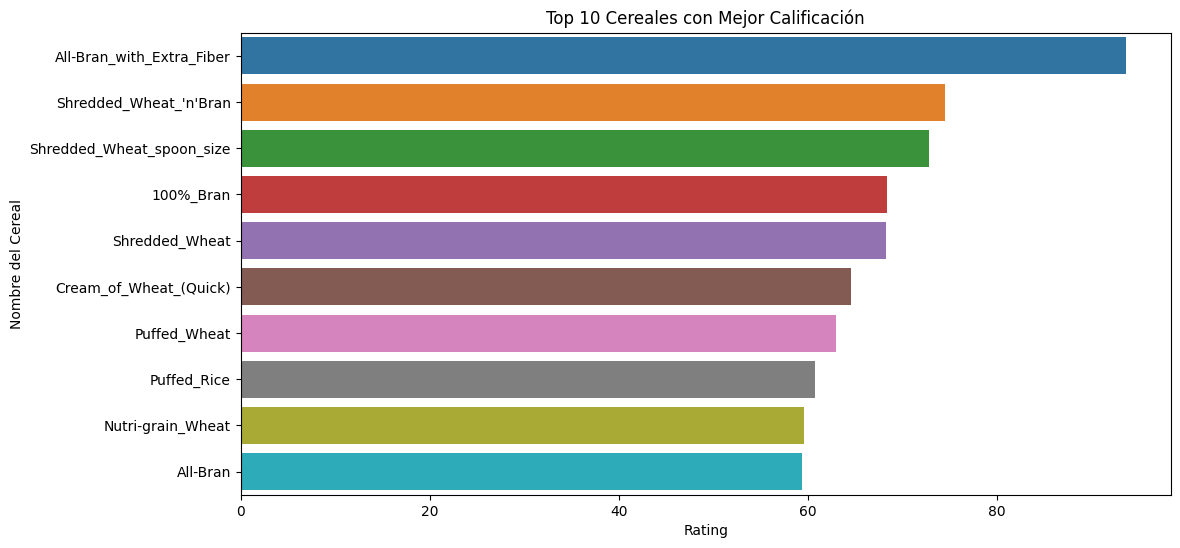

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sorted_df = cereals_df.sort_values(by='rating', ascending=False)
top_10_cereals = sorted_df.head(10)

print('Top 10 productos y sus fabricantes\n')
for i in range(10):
    print(f'{i + 1}. {top_10_cereals["name"].iloc[i]}, {top_10_cereals["mfr"].iloc[i]}') # Imprime la lista con el nombre del cereal y su fabricante

plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='name', data=top_10_cereals, orient='h')
plt.xlabel('Rating')
plt.ylabel('Nombre del Cereal')
plt.title('Top 10 Cereales con Mejor Calificación')
plt.show()

4a) Compara la distribución de las calorías según el fabricante, por medio de boxplots.

In [12]:
cereals_df['calories'].describe()

count     77.000000
mean     106.883117
std       19.484119
min       50.000000
25%      100.000000
50%      110.000000
75%      110.000000
max      160.000000
Name: calories, dtype: float64

<Axes: xlabel='mfr', ylabel='calories'>

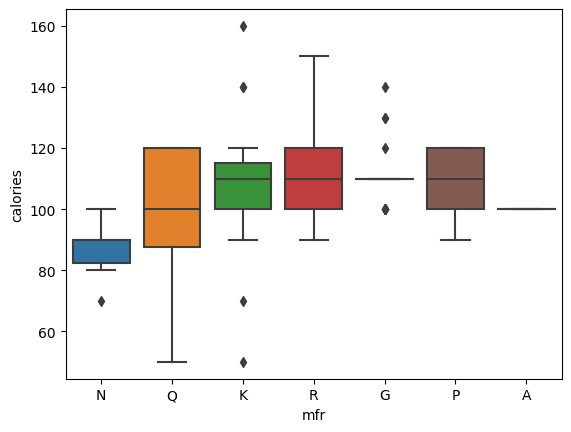

In [13]:
sns.boxplot(x = 'mfr', y = "calories", data = cereals_df)

4b) ¿Cuáles son las dos variables que tienen mayor correlación con `rating`?

***Las dos variables que tienen mayor correlación con rating son: `Fiber` y `Protein`***

In [14]:
correlation_matrix = cereals_df.corr()
rating_correlation = correlation_matrix['rating'].sort_values(ascending = False)
rating_correlation

<ipython-input-14-ccc132d561a0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = cereals_df.corr()


rating      1.000000
fiber       0.584160
protein     0.470618
potass      0.416009
carbo       0.088712
shelf       0.025159
cups       -0.203160
vitamins   -0.240544
weight     -0.298124
sodium     -0.401295
fat        -0.409284
calories   -0.689376
sugars     -0.763902
Name: rating, dtype: float64

<Axes: >

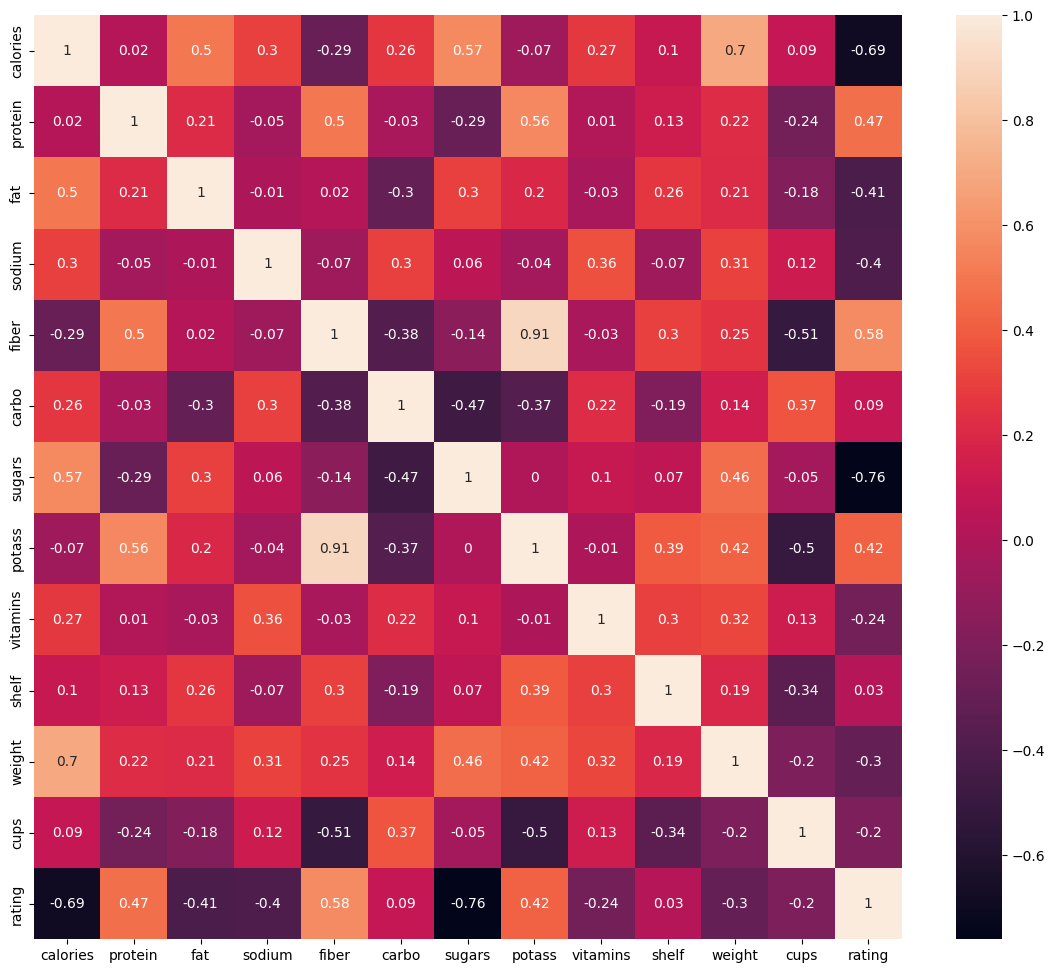

In [15]:
plt.rcParams['figure.figsize'] = (14, 12)
correlation = cereals_df.corr(method = 'pearson', numeric_only = True)
sns.heatmap(round(correlation,2), annot = True)

5. Elimina todos los registros con algún dato faltante y reinicia el índice del dataframe para que quede con valores consecutivos.

**Primero revisamos las columnas que tienen valores nulos.**

In [16]:
cereals_df.isna().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

**Eliminamos todos aquellos registros con un dato faltante y reiniciamos el indice.**

In [17]:
cereals_df = cereals_df.dropna().reset_index(drop=True)
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
70,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
71,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
72,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


**Revisamos nuevamente las columnas que tengan algun valor nulo y verificamos que ahora todas tiene 0 valores nulos.**

In [18]:
cereals_df.isna().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

# **Parte 2**. Ingeniería de características

6. Considerando que `rating` es la variable de salida, almacénala en una variable `y` y separa los predictores **numéricos** en `X`. Escala los valores de `X` y aplica `PCA` para proyectar los datos en el nuevo espacio de vectores.



***I. Almacenamos la variable de salida `rating` y la almacenamos en `y`***

***II. Almacenamos nuestros predictores númericos en `x`, pero descartando la variable 'shelf', debido a que es una variable categórica nominal, donde las operaciones aritméticas aplicadas a ella no nos proporcionan información relevante o contribuyente al análisis***


In [19]:
x = cereals_df.iloc[:,3:-1]
x = x.drop('shelf', axis = 1) #Descartamos "shelf" por ser una variable numérica discreta (y en realidad una categórica nominal) que no aporta al análisis PCA
print('Numerical predictors: \n\n', x)
y = cereals_df.loc[:,'rating']
print('Target: \n\n', y)

Numerical predictors: 

     calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins  \
0         70        4    1     130   10.0    5.0     6.0   280.0        25   
1        120        3    5      15    2.0    8.0     8.0   135.0         0   
2         70        4    1     260    9.0    7.0     5.0   320.0        25   
3         50        4    0     140   14.0    8.0     0.0   330.0        25   
4        110        2    2     180    1.5   10.5    10.0    70.0        25   
..       ...      ...  ...     ...    ...    ...     ...     ...       ...   
69       110        2    1     250    0.0   21.0     3.0    60.0        25   
70       110        1    1     140    0.0   13.0    12.0    25.0        25   
71       100        3    1     230    3.0   17.0     3.0   115.0        25   
72       100        3    1     200    3.0   17.0     3.0   110.0        25   
73       110        2    1     200    1.0   16.0     8.0    60.0        25   

    weight  cups  
0      1.0  0.33  


***Escalamos nuestras variables numericas predictoras con z-score***

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled[0:5]

array([[-1.87865227,  1.3911796 ,  0.        , -0.39369182,  3.25070642,
        -2.51720557, -0.25594026,  2.57800107, -0.18308346, -0.20220332,
        -2.09989497],
       [ 0.65821393,  0.45529514,  4.        , -1.79257173, -0.0729865 ,
        -1.74106718,  0.2060007 ,  0.51828763, -1.31209813, -0.20220332,
         0.76191901],
       [-1.87865227,  1.3911796 ,  0.        ,  1.18765068,  2.8352448 ,
        -1.99977998, -0.48691074,  3.14619788, -0.18308346, -0.20220332,
        -2.09989497],
       [-2.89339875,  1.3911796 , -1.        , -0.27205009,  4.91255287,
        -1.74106718, -1.64176313,  3.28824708, -0.18308346, -0.20220332,
        -1.37376306],
       [ 0.15084069, -0.48058932,  1.        ,  0.21451684, -0.28071731,
        -1.0942852 ,  0.66794165, -0.40503219, -0.18308346, -0.20220332,
        -0.30592203]])

***Aplicamos PCA para proyectar los datos en el nuevo espacio de vectores***

In [21]:
from sklearn.decomposition import PCA
pca = PCA()
x_projected = pca.fit_transform(x_scaled)
x_projected = pd.DataFrame(x_projected)
x_projected.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,5.041308,2.470097,-0.054581,-1.129434,0.667588,0.640401,0.022399,0.059205,0.026325,0.250917,0.021692
1,1.503568,-0.310316,-3.014154,3.202758,1.344651,0.066992,-0.396573,-1.228817,-0.594837,0.042521,-0.096381
2,4.866598,1.946814,0.869813,-1.225550,0.358265,1.832924,-0.232872,0.017511,0.116766,-0.493001,-0.031211
3,5.468886,3.899001,1.883856,-1.628993,0.601691,0.374002,-0.811525,-1.003853,0.063792,0.720550,0.101563
4,0.088378,-0.391583,-1.490079,0.054716,0.331903,0.848360,0.271351,0.033091,-0.183945,0.169367,-0.050918


7. Obtén la curva del porcentaje de varianza acumulada y determine el número mínimo de componentes principales que explique más del 90% de la varianza. Imprime la información de dichos componentes.



***I. Presentamos los porcentajes de varianza obtenidos de manera individual***

***II. Presentamos los porcentajes de varianza acumulada de acuerdo a la suma consecutiva de los valores***

***Observando los resultados de la varianza acumulada, podemos identificar que se necesitan mínimo 7 componentes principales para poder explicar más del 90% de la varianza (95.2%)***


***III. Imprimimos la información de esos primeros 7 componentes principales***





Porcentaje de varianza: [28.01834379 23.95510445 16.23659637  8.9907879   6.55756856  6.10289481
  5.34786268  3.25518991  0.84517226  0.52460471  0.16587455] 

Varianza acumulada: [0.28018344 0.51973448 0.68210045 0.77200833 0.83758401 0.89861296
 0.95209159 0.98464348 0.99309521 0.99834125 1.        ]


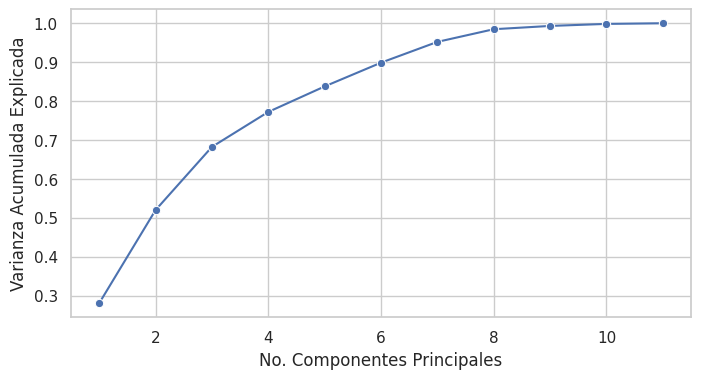


7 Principal Components:


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
Principal component 1,0.010406,0.356782,0.190272,0.064721,0.499986,0.295779,0.058735,0.531454,0.037347,0.237423,0.388687
Principal component 2,0.575130,0.004793,0.269283,0.304308,0.147096,0.144863,0.375803,0.012672,0.290393,0.480867,0.067188
Principal component 3,0.077854,0.326538,0.291224,0.343186,0.174057,0.512935,0.495255,0.130621,0.327460,0.122190,0.082617
Principal component 4,0.235762,0.448093,0.594573,0.200631,0.185029,0.208854,0.339460,0.074259,0.337401,0.152549,0.118930
Principal component 5,0.155480,0.195725,0.265709,0.077029,0.023495,0.361585,0.032551,0.029672,0.673697,0.288528,0.436613
Principal component 6,0.146747,0.107121,0.310860,0.828721,0.003088,0.211947,0.087060,0.052258,0.151372,0.280166,0.164101
Principal component 7,0.008548,0.155447,0.197886,0.197637,0.170916,0.110107,0.201098,0.206211,0.463438,0.107788,0.739494


In [22]:
print("Porcentaje de varianza:", pca.explained_variance_ratio_ * 100, "\n")
print("Varianza acumulada:", np.cumsum(pca.explained_variance_ratio_))

num_componentes_principales = list(range(1, 12))
components_df = pd.DataFrame({'No. Componentes Principales': num_componentes_principales, 'Varianza Acumulada Explicada': np.cumsum(pca.explained_variance_ratio_)})
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.lineplot(x = 'No. Componentes Principales', y = 'Varianza Acumulada Explicada', data = components_df, marker='o') #Graficamos la curva de varianza acumulada
plt.show()

num_components = 7  #Determinamos el número de componentes
pc_df = pd.DataFrame(abs(pca.components_[:num_components]), columns = x.columns, index = ['Principal component {}'.format(i) for i in range (1, num_components + 1)])
print("\n" + str(num_components) + " Principal Components:")
pc_df

8. ¿Cuáles son las tres variables más importantes en el cálculo del primer componente?

***Las 3 variables más determinantes en el cálculo del primer componente son "potass", "fiber" y "cups", con valores de 0.53, 0.50 y 0.39 respectivamente***


Text(0, 0.5, 'Importancia del predictor para CP1')

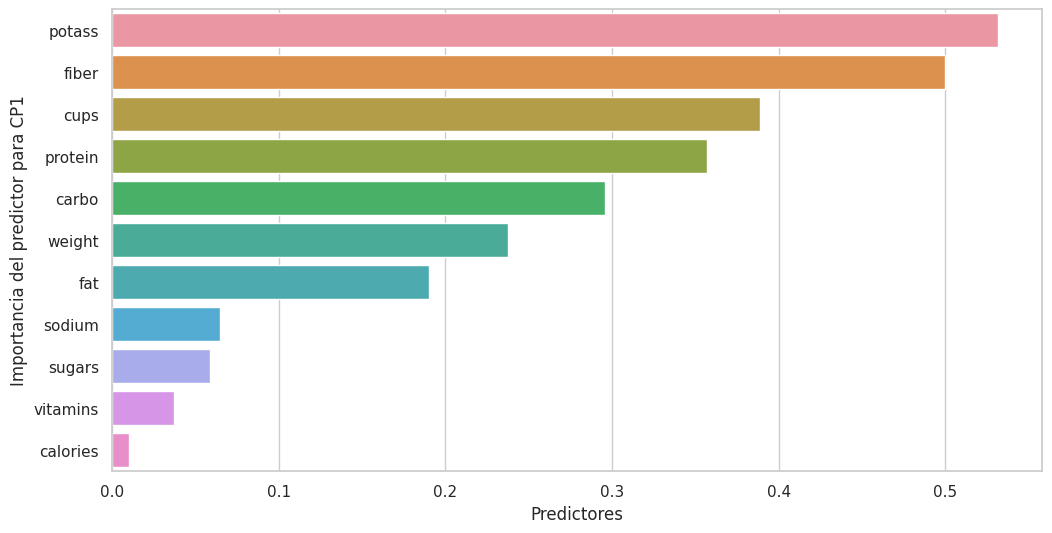

In [29]:
sorted_loadings = pc_df.loc['Principal component 1'].abs().sort_values(ascending = False) #Obtenemos las cargas ordenadas del primer componente principal
top_3 = sorted_loadings.head(3) #Guardamos las 3 variables con los valores más altos
top_3

aux_df = pc_df.iloc[0:1].transpose()
aux_df = aux_df.sort_values(by = aux_df.columns[0], ascending = False)
plt.figure(figsize=(12, 6))
sns.barplot(x = aux_df[aux_df.columns[0]], y = aux_df.index, orient = 'h')
plt.xlabel('Predictores')
plt.ylabel('Importancia del predictor para CP1')

9. ¿Todas las variables categóricas son predictores? Aplica una técnica de encoding a las que sí lo sean. Justifica la elección de tu técnica.

**No todas las variables categóricas son predictores, en este caso la variable "name" no es un valor que aporte al análisis.**

**Utilizamos One Hot Encoding, ya que nos permite crear una columna binaria para cada valor único que exista en la variable categórica que estamos codificando. De esta manera, cada registro queda representado por un vector binario que indica la presencia o ausencia de cada valor categórico dando completitud a la matriz.**

**NOTA: Una desventaja de este método es que aumenta la dimensionalidad del conjunto de datos, y en algunos casos puede resultar problemático.**

In [24]:
categorical_variables = cereals_df.select_dtypes(include = ['object']) #Filtramos las columnas categóricas
categorical_variables.describe() #Describimos las variables categóricas para comprobar su distribución y tipo

,name,mfr,type
count,74,74,74
unique,74,7,2
top,100%_Bran,K,C
freq,1,23,73


In [25]:
categorical_variables = ['mfr', 'shelf'] #Seleccionamos las variables categóricas excluyendo la variable 'name' ya que no aporta al análisis, reincorporamos 'shelf' para aplicar el encoding.

In [26]:
from sklearn.preprocessing import OneHotEncoder #Utilizamos OneHotEncoder para transformar las variables en valores binarios para cada categoría y generando una matriz dispersa.
one_hot_encoder = OneHotEncoder(sparse = False, drop = 'first')
categorical_onehot_encoded = one_hot_encoder.fit_transform(cereals_df[categorical_variables])
onehot_encode_df = pd.DataFrame(categorical_onehot_encoded)
onehot_encode_df.columns = one_hot_encoder.get_feature_names_out()
onehot_encode_df.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,shelf_2,shelf_3
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


10. Conjunta, en un dataframe, los valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas que serán predictores y la variable de salida. Almacena el dataframe resultante en archivo.

In [27]:
concat_df = x_projected.iloc[:, 0:num_components] #Comenzamos construyendo el nuevo data set con las proyecciones de los componentes principales mínimos que explican más del 90% de varianza
concat_df.columns = ['PC{}'.format(i) for i in range(1, num_components + 1)] #Asignamos nombres a las proyecciones de los componentes
concat_df = pd.concat([concat_df, onehot_encode_df, y], axis = 1) #Concatenamos los valores proyectados, los valores binarios y la variable de salida. Los guardamos en el nuevo dataframe.
print(concat_df.shape)
concat_df.describe() #Mostramos la descripción de los datos del nuevo dataframe.

(74, 16)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,shelf_2,shelf_3,rating
count,7.400000e+01,7.400000e+01,7.400000e+01,7.400000e+01,7.400000e+01,7.400000e+01,7.400000e+01,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,5.401085e-17,5.101025e-17,-1.687839e-17,-4.088321e-17,-1.800362e-17,-2.775558e-17,2.025407e-17,0.297297,0.310811,0.067568,0.121622,0.094595,0.094595,0.270270,0.472973,42.371787
std,1.767551e+00,1.634368e+00,1.345545e+00,1.001266e+00,8.551104e-01,8.249331e-01,7.722197e-01,0.460188,0.465985,0.252716,0.329079,0.294652,0.294652,0.447131,0.502677,14.033712
min,-2.982803e+00,-3.997735e+00,-3.014154e+00,-1.733833e+00,-1.577045e+00,-1.804518e+00,-1.689181e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.042851
25%,-1.259669e+00,-6.586081e-01,-1.067457e+00,-6.998604e-01,-6.550103e-01,-2.668671e-01,-4.410870e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.449210
50%,-1.676629e-01,-2.031323e-01,-1.629756e-01,-1.090887e-01,1.164783e-01,5.848320e-02,-1.567113e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.253086
75%,1.032320e+00,5.172131e-01,1.134521e+00,5.555992e-01,3.831944e-01,5.483517e-01,4.069263e-01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,50.520611
max,5.468886e+00,5.250702e+00,3.198114e+00,3.202758e+00,2.521958e+00,1.832924e+00,2.062668e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,93.704912


In [28]:
concat_df.to_csv('Cereals_PCA.csv') #Guardamos el dataframe procesado en un nuevo archivo csv.